# Analyzing Mars 2020 MEDA Data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from muldoon.met_timeseries import MetTimeseries
from muldoon.utils import *
from muldoon.read_data import *

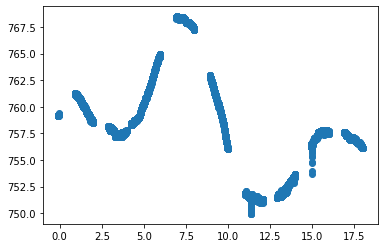

In [2]:
# Read in data file
filename = "./WE__0089___________DER_PS__________________P01.CSV"
time, pressure = read_Perseverance_MEDA_data(filename)
plt.scatter(time, pressure)